In [5]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# import sys
# !{sys.executable} -m pip install pandas-profiling

In [6]:
%matplotlib inline

In [7]:
pd.set_option('display.max_columns', None)  # при вызове .head будет показывать все колонки

In [8]:
data = pd.read_csv('train.csv')

### Знакомство с данными

In [9]:
data.shape  # size of dataframe

(15129, 21)

In [10]:
data.info()  # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15129 non-null  int64  
 1   date           15129 non-null  object 
 2   price          13763 non-null  float64
 3   bedrooms       13615 non-null  float64
 4   bathrooms      13616 non-null  float64
 5   sqft_living    13618 non-null  float64
 6   sqft_lot       13618 non-null  float64
 7   floors         14683 non-null  float64
 8   waterfront     14677 non-null  float64
 9   view           14695 non-null  float64
 10  condition      14656 non-null  float64
 11  grade          14666 non-null  float64
 12  sqft_above     13569 non-null  float64
 13  sqft_basement  14662 non-null  float64
 14  yr_built       14679 non-null  float64
 15  yr_renovated   14677 non-null  float64
 16  zipcode        14692 non-null  float64
 17  lat            14682 non-null  float64
 18  long  

Познакомимся с колонками в данных

    date: Date house was sold (Дата продажи участка)
    price: Price of the sold house (Цена продажи)
    bedrooms: Number of Bedrooms (Число спален)
    bathrooms: Number of bathrooms (Число ванных комнат)
    sqft_living: Square footage of the living space (жилая площадь)
    sqrt_lot: Square footage of the lot (общая площадь)
    floors: Total floors in the house (кол-во этажей в доме)
    waterfront: Whether the house is on a waterfront(1: yes, 0: no) (дом на набережной?)
    view: special view? (вид из окна)
    condition: Condition of the house (Состояние здания)
    grade: unknown 
    sqft_above: Square footage of house apart from basement (Площадь здания без подвала)
    sqft_basement: Square footage of the basement (Площадь подвала)
    yr_built: Built year (Год постройки)
    yr_renovated: Year when the house was renovated (Год реновации)
    zipcode: zipcode of the house (Индекс здания)
    lat: Latitude coordinate (Широта)
    long Longitude coordinate (Долгота)
    sqft_living15: Living room area in 2015(implies some renovations) (после реновации)
    sqrt_lot15: Lot area in 2015(implies some renovations) (после реновации)

In [11]:
data.head()  # first look

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5561000190,20140502T000000,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,4.0,9.0,NaN,0.0,1977.0,0.0,98027.0,47.4635,-121.991,NaN,NaN
1,2207200675,20140502T000000,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4.0,7.0,NaN,0.0,1956.0,0.0,98007.0,47.6022,-122.134,NaN,NaN
2,3390600010,20140502T000000,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4.0,7.0,NaN,0.0,1955.0,0.0,98106.0,47.5334,-122.365,NaN,NaN
3,7525000080,20140502T000000,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,8.0,NaN,360.0,1980.0,0.0,98074.0,47.6267,-122.046,NaN,NaN
4,5072200040,20140502T000000,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0,5.0,8.0,NaN,310.0,1957.0,0.0,98166.0,47.4419,-122.340,NaN,NaN


In [17]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Приведем даты к соответствующему виду

In [18]:
data['date'] = pd.to_datetime(data['date'])

Разберемся с пропусками в начале

In [19]:
out = data.isna()['price'].cumsum()  

In [20]:
out[out == (out.index + 1)].tail(1) # если кумулятивная сумма будет равна индексу значит под ряд пропускиz

1011    1012
Name: price, dtype: int64

У нас первые 1011 строк пропущены можем предположить, что они не записывались (спрашиваем у бизнеса)

In [21]:
data = data.iloc[1012:]

In [22]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1012,6378500230,2014-05-20,423000.0,40.0,1.75,1940.0,6909.0,1.0,0.0,0.0,4.0,7.0,970.0,970.0,1941.0,0.0,98133.0,47.7108,-122.352,1460.0,6906.0
1013,5104520150,2014-05-20,426000.0,4.0,2.50,2800.0,8494.0,2.0,0.0,0.0,3.0,8.0,2800.0,0.0,2004.0,0.0,98038.0,47.3521,-122.009,NaN,8494.0
1014,7702010030,2014-05-20,551000.0,3.0,2.50,2830.0,5802.0,2.0,0.0,0.0,3.0,9.0,28300.0,0.0,2001.0,0.0,98028.0,47.7605,-122.234,2500.0,5788.0
1015,7247000035,2014-05-20,210000.0,4.0,1.75,2180.0,28710.0,1.0,0.0,0.0,3.0,8.0,1180.0,1000.0,1950.0,0.0,98198.0,47.4050,-122.288,2180.0,28710.0
1016,8562790760,2014-05-20,785000.0,NaN,3.50,3070.0,4684.0,2.0,0.0,0.0,3.0,10.0,NaN,880.0,2009.0,0.0,98027.0,47.5316,-122.076,2290.0,2664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,9528104286,2015-01-13,455000.0,2.0,1.50,10200.0,1146.0,3.0,0.0,0.0,3.0,7.0,1020.0,0.0,2001.0,0.0,98115.0,47.6774,-122.325,1138.0,1156.0
15125,8682261440,2015-01-13,NaN,2.0,1.75,15600.0,4500.0,1.0,0.0,0.0,3.0,8.0,1560.0,0.0,2004.0,0.0,98053.0,47.7128,-122.032,1860.0,4500.0
15126,2767700022,2015-01-13,500000.0,3.0,3.25,1520.0,1500.0,3.0,0.0,0.0,3.0,7.0,1520.0,0.0,2000.0,0.0,98107.0,47.6700,-122.389,1520.0,1323.0
15127,1939050110,2015-01-13,500000.0,3.0,2.25,1440.0,15661.0,1.0,0.0,0.0,3.0,8.0,1180.0,260.0,1988.0,0.0,98074.0,47.6225,-122.038,1440.0,13963.0


### Снова посмотрим на данные но без пропусков в начале и с отформатированными датами

In [23]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Посмотрим на распределение цен

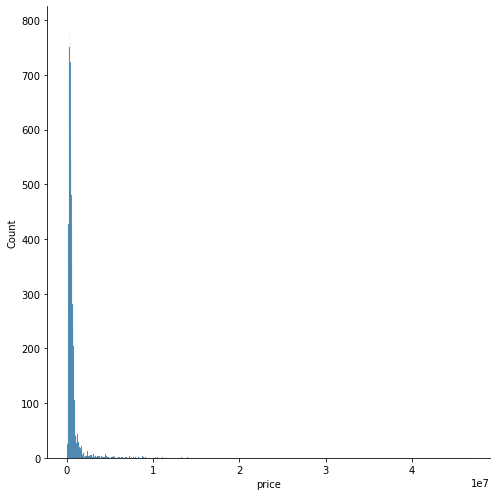

In [63]:
sns.displot(data, x='price', height=7)

In [65]:
data['price'] = np.log(data['price'])

<ipython-input-65-bbe5168a58f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = np.log(data['price'])


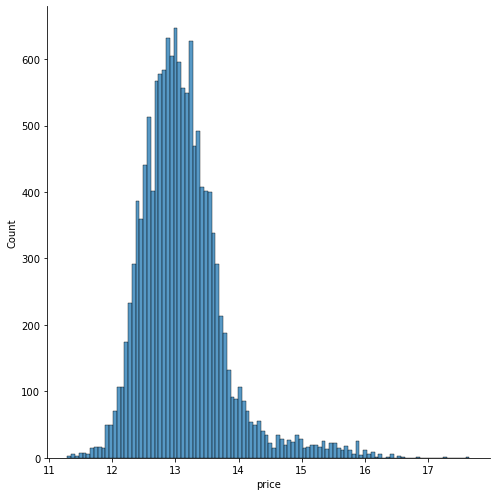

In [66]:
sns.displot(data, x='price', height=7)

<AxesSubplot:>

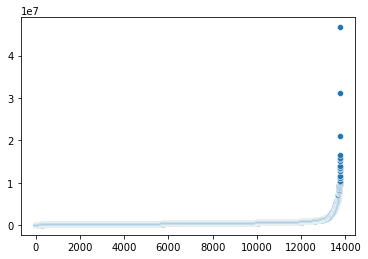

In [64]:
sns.scatterplot(x=range(len(data)), y=np.sort(data['price']))

Видим что данные распределены +- логнормально

In [67]:
data['price'].describe()

count    13763.000000
mean        13.113066
std          0.657628
min         11.289782
25%         12.691580
50%         13.031344
75%         13.415033
max         17.658826
Name: price, dtype: float64

### Рассмотрим распределение численных признаков

In [68]:
CONTINUES_COLS = [
    "price",
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "sqft_living15",
    "sqft_lot15"
]

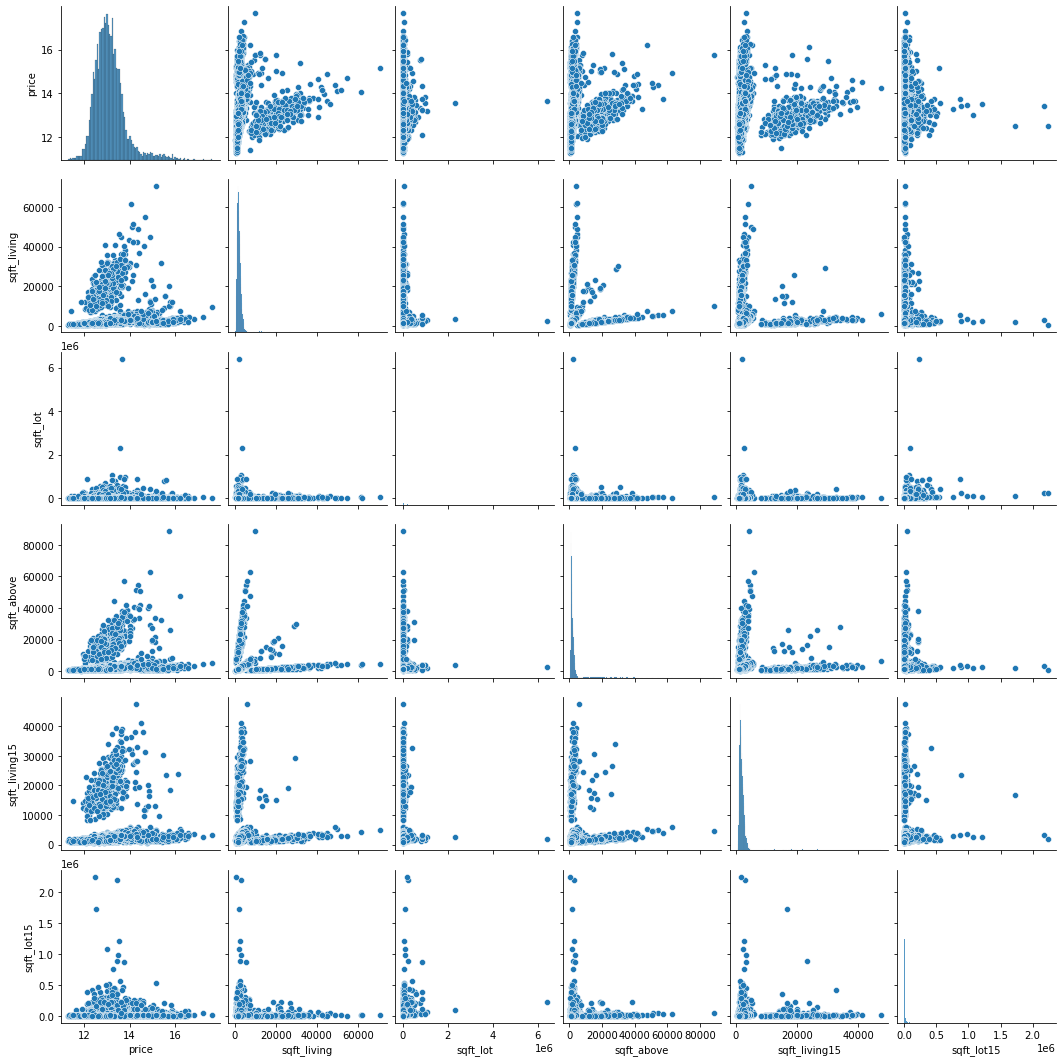

In [69]:
sns.pairplot(data[CONTINUES_COLS])

Кто видит странности? 

### Рассмотрим очевидную зависимость жилой площади и стоимости

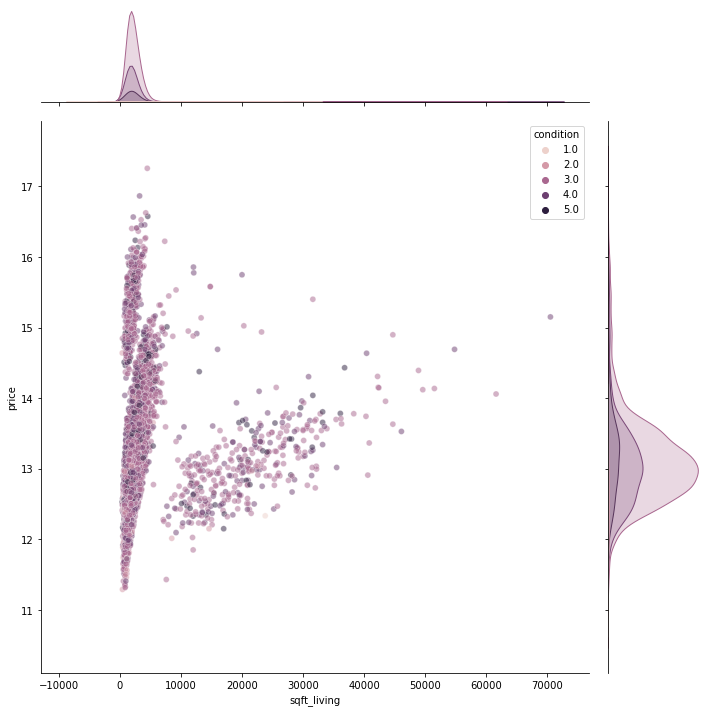

In [79]:
sns.jointplot(data=data, x='sqft_living', y='price', hue='condition', alpha = 0.5, height=10)

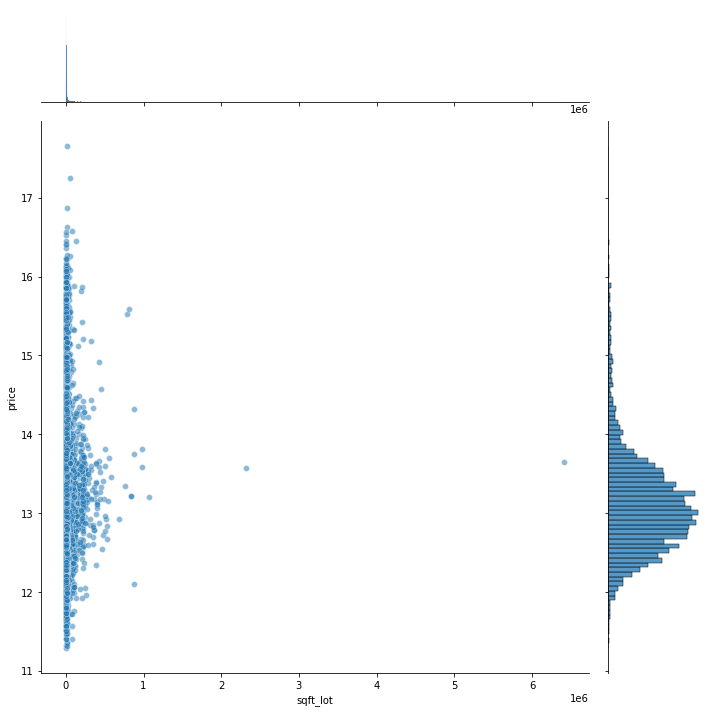

In [71]:
sns.jointplot(data=data, x='sqft_lot', y='price', alpha = 0.5, height=10)

Можем увидеть несколько кластеров для которых свойственен свой наклон линейной зависимости

### Посмотрим на распределения внутри категорий

Condition

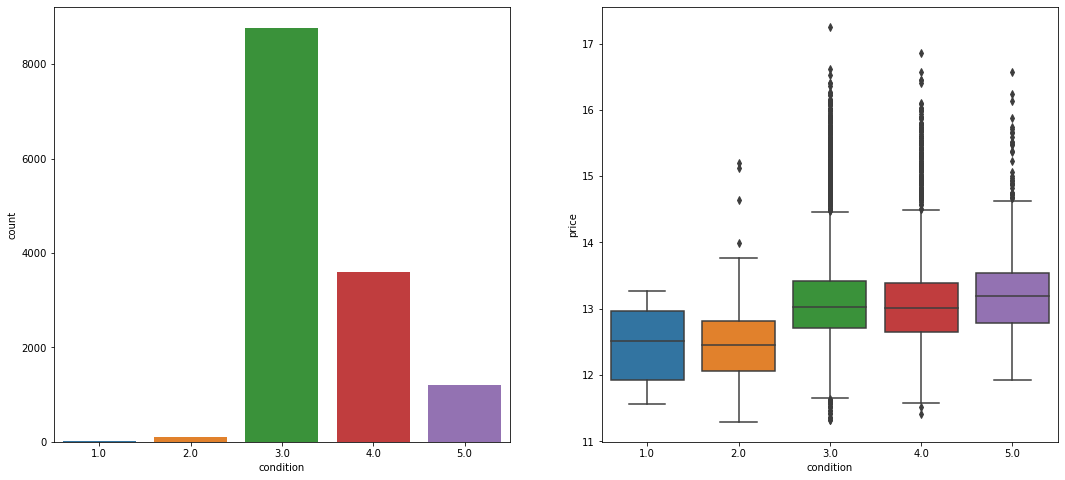

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='condition', data=data, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

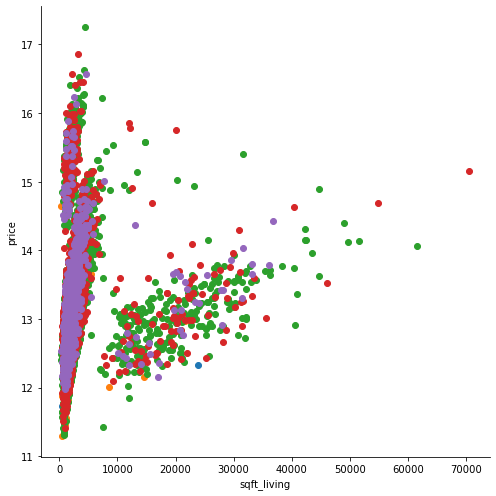

In [73]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='condition', height=7)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Bedrooms

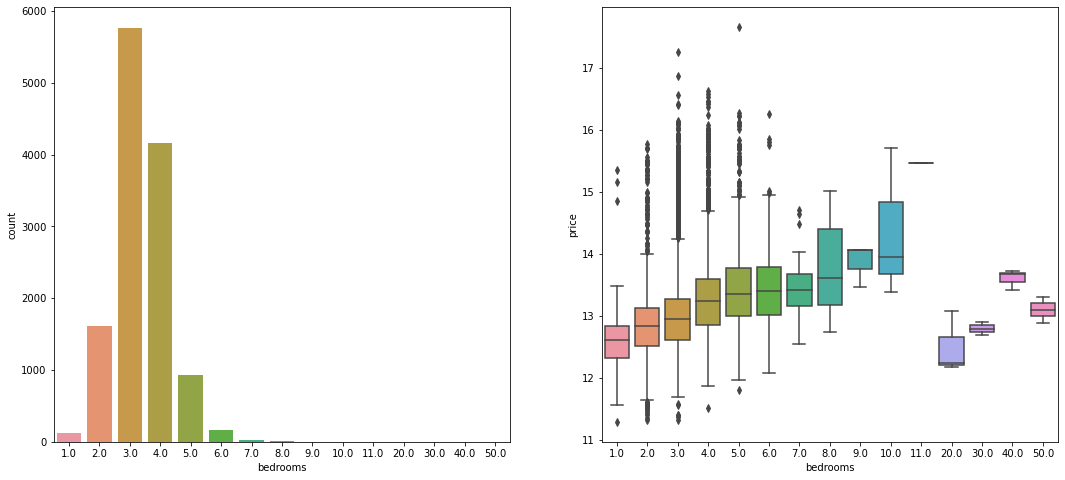

In [118]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bedrooms', data=data, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

In [81]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1012,6378500230,20140520T000000,12.955127,40.0,1.75,1940.0,6909.0,1.0,0.0,0.0,4.0,7.0,970.0,970.0,1941.0,0.0,98133.0,47.7108,-122.352,1460.0,6906.0
1013,5104520150,20140520T000000,12.962195,4.0,2.50,2800.0,8494.0,2.0,0.0,0.0,3.0,8.0,2800.0,0.0,2004.0,0.0,98038.0,47.3521,-122.009,NaN,8494.0
1014,7702010030,20140520T000000,13.219490,3.0,2.50,2830.0,5802.0,2.0,0.0,0.0,3.0,9.0,28300.0,0.0,2001.0,0.0,98028.0,47.7605,-122.234,2500.0,5788.0
1015,7247000035,20140520T000000,12.254863,4.0,1.75,2180.0,28710.0,1.0,0.0,0.0,3.0,8.0,1180.0,1000.0,1950.0,0.0,98198.0,47.4050,-122.288,2180.0,28710.0
1016,8562790760,20140520T000000,13.573439,NaN,3.50,3070.0,4684.0,2.0,0.0,0.0,3.0,10.0,NaN,880.0,2009.0,0.0,98027.0,47.5316,-122.076,2290.0,2664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,9528104286,20150113T000000,13.028053,2.0,1.50,10200.0,1146.0,3.0,0.0,0.0,3.0,7.0,1020.0,0.0,2001.0,0.0,98115.0,47.6774,-122.325,1138.0,1156.0
15125,8682261440,20150113T000000,NaN,2.0,1.75,15600.0,4500.0,1.0,0.0,0.0,3.0,8.0,1560.0,0.0,2004.0,0.0,98053.0,47.7128,-122.032,1860.0,4500.0
15126,2767700022,20150113T000000,13.122363,3.0,3.25,1520.0,1500.0,3.0,0.0,0.0,3.0,7.0,1520.0,0.0,2000.0,0.0,98107.0,47.6700,-122.389,1520.0,1323.0
15127,1939050110,20150113T000000,13.122363,3.0,2.25,1440.0,15661.0,1.0,0.0,0.0,3.0,8.0,1180.0,260.0,1988.0,0.0,98074.0,47.6225,-122.038,1440.0,13963.0


In [101]:
data.loc[data['bedrooms'] == 0] = 1

/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [102]:
data['sqft_per_bedroom'] = (data['sqft_living'] / data['bedrooms'].fillna(1))

<ipython-input-102-78a35fc0892c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_per_bedroom'] = (data['sqft_living'] / data['bedrooms'].fillna(1))


<AxesSubplot:>

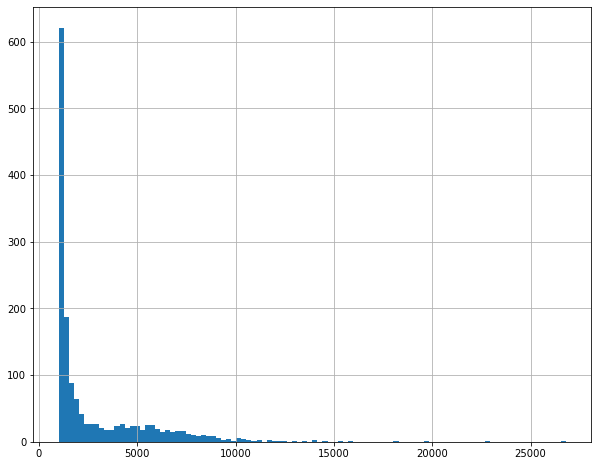

In [117]:
plt.figure(figsize=(10, 8))
data[data['sqft_per_bedroom'] > 1000]['sqft_per_bedroom'].hist(bins=100)

<AxesSubplot:>

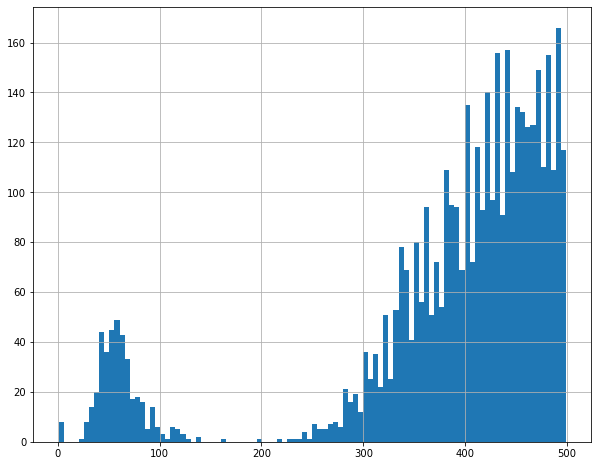

In [111]:
plt.figure(figsize=(10, 8))
data[data['sqft_per_bedroom'] < 500]['sqft_per_bedroom'].hist(bins=100)

In [112]:
(data['sqft_per_bedroom'] < 200).sum()

399

In [113]:
data = data[data['sqft_per_bedroom'] > 200]

In [119]:
data = data[data['bedrooms'] < 9]

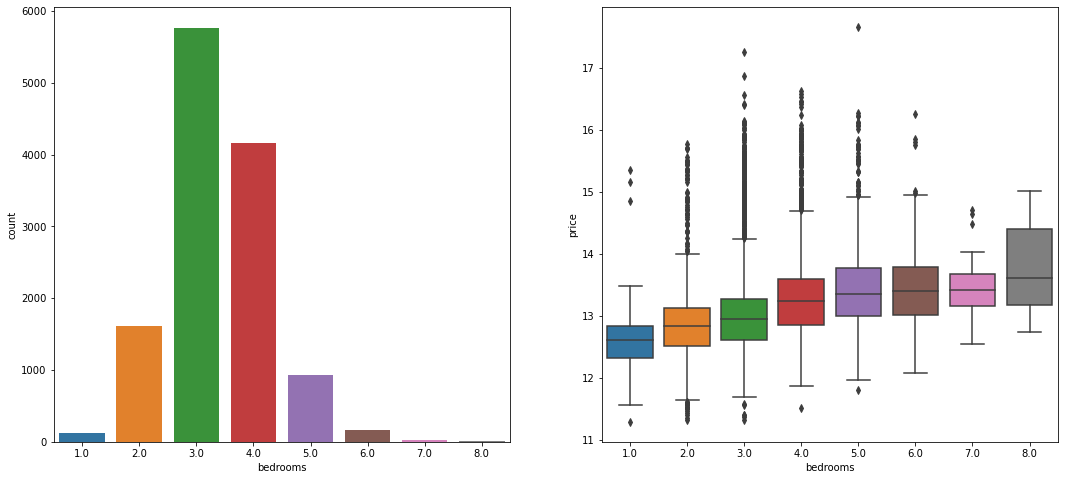

In [121]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bedrooms', data=data, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

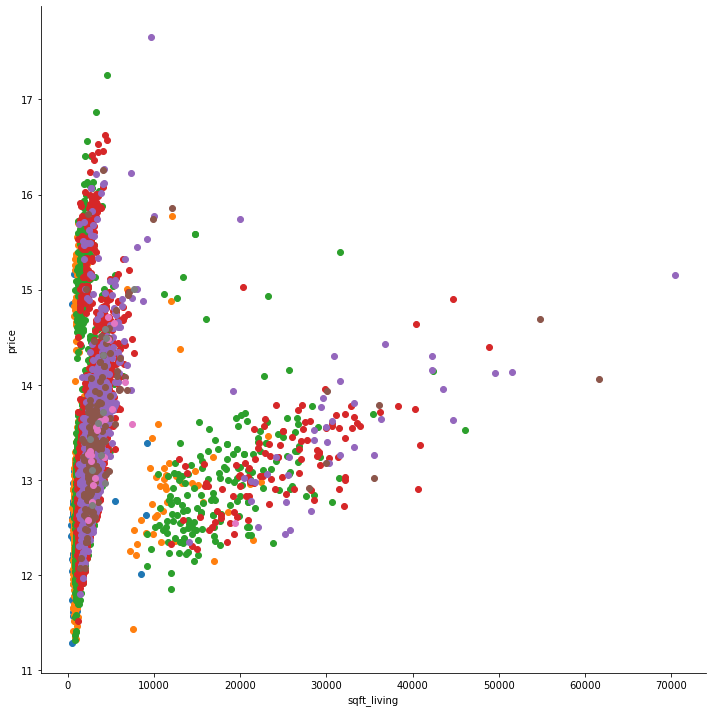

In [122]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bedrooms', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

View

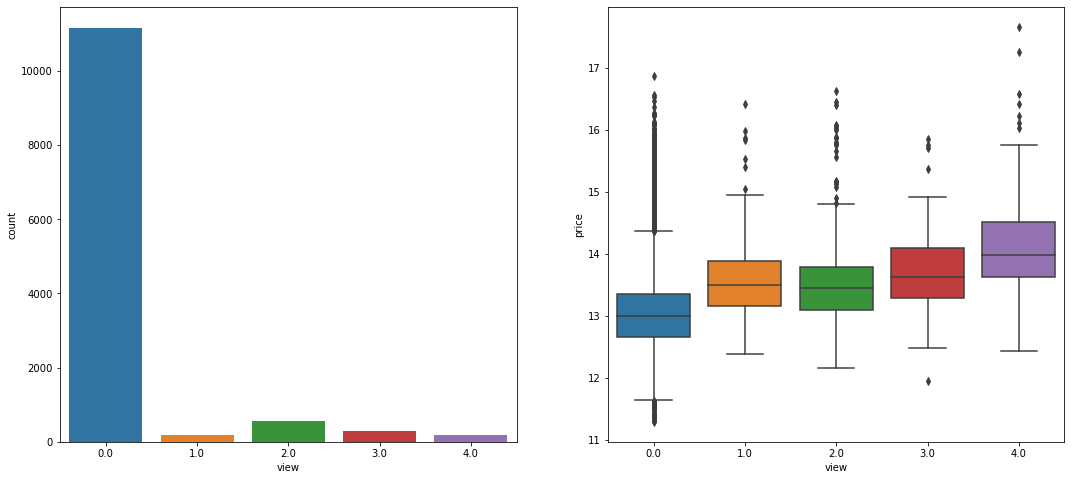

In [124]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='view', data=data, ax=ax[0])
sns.boxplot(x='view', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

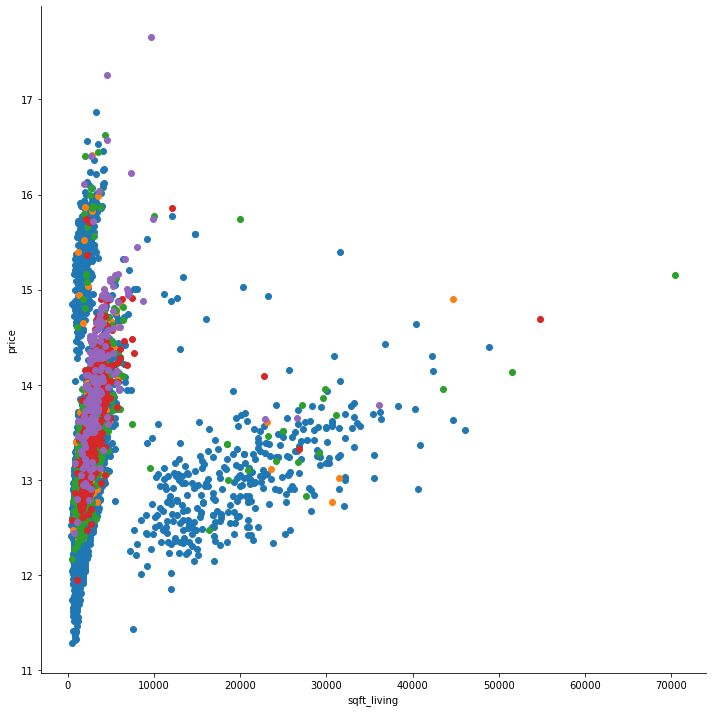

In [125]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='view', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Bathrooms

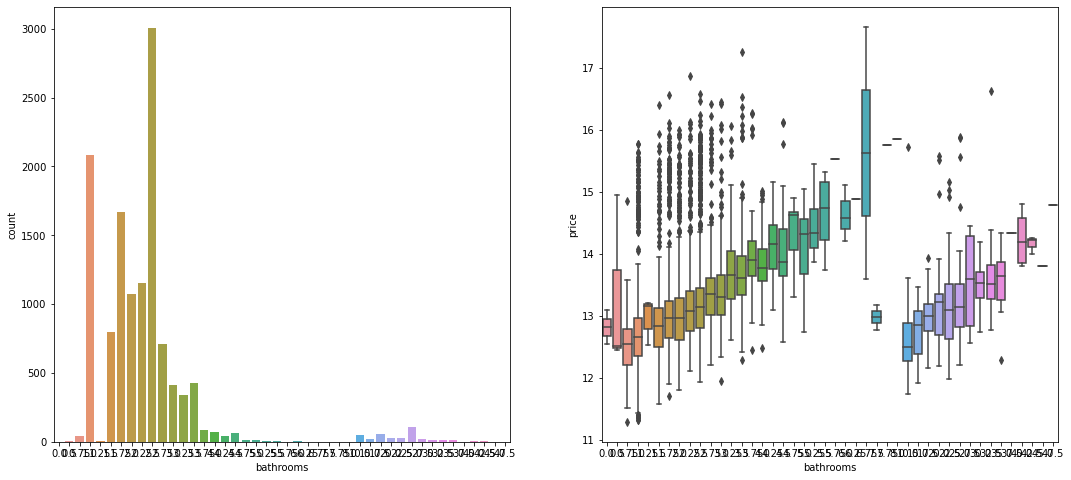

In [126]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bathrooms', data=data, ax=ax[0])
sns.boxplot(x='bathrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

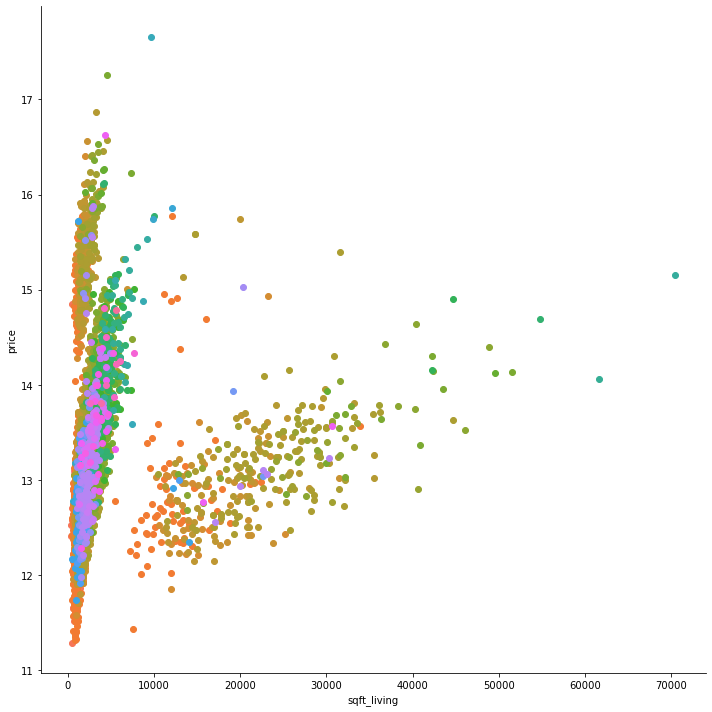

In [127]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bathrooms', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

In [141]:
data.loc[data['bathrooms'] == 0, 'bathrooms'] = 1

In [142]:
(data['bathrooms'] == 0).sum()

0

In [143]:
data['sqft_per_bedroom'] = (data['sqft_living'] / data['bathrooms'].fillna(1))

<AxesSubplot:>

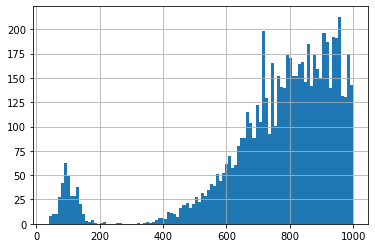

In [146]:
data[data['sqft_per_bedroom'] < 1000]['sqft_per_bedroom'].hist(bins=100)

In [147]:
data = data[data['sqft_per_bedroom'] > 300]

<AxesSubplot:>

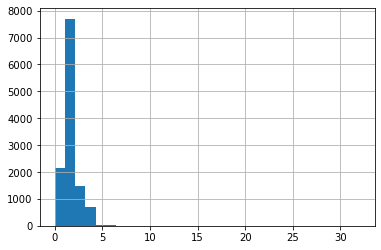

In [160]:
data['bathrooms'].round().hist(bins=30)

In [163]:
len(data[data['bathrooms'] > 7])

0

In [161]:
data = data[data['bathrooms'] < 7]

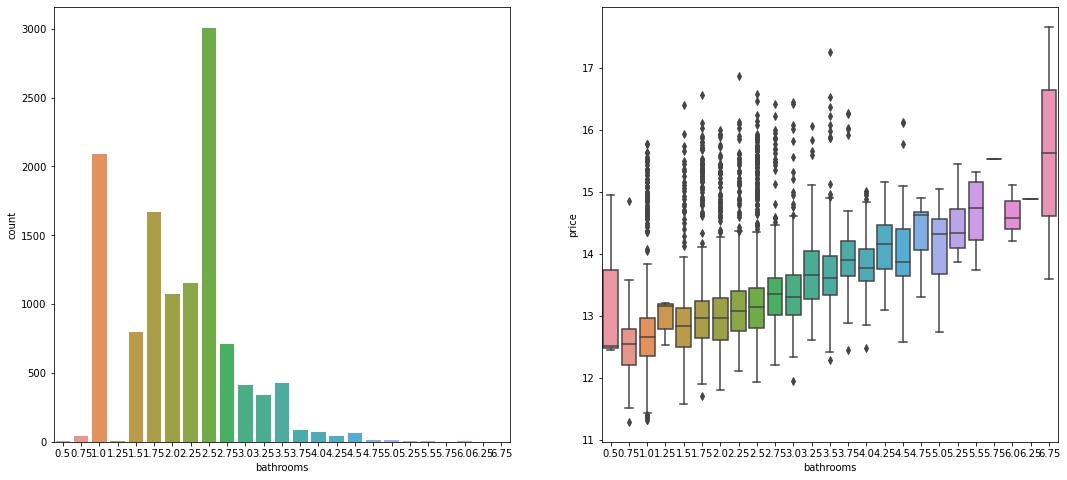

In [164]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bathrooms', data=data, ax=ax[0])
sns.boxplot(x='bathrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

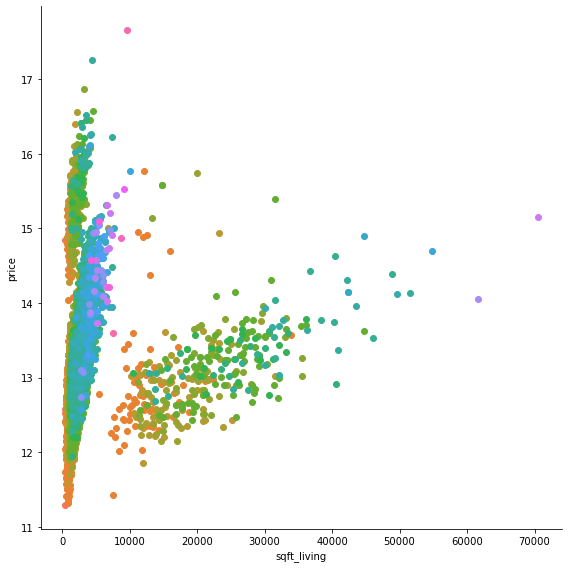

In [166]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bathrooms', height=8)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Floor

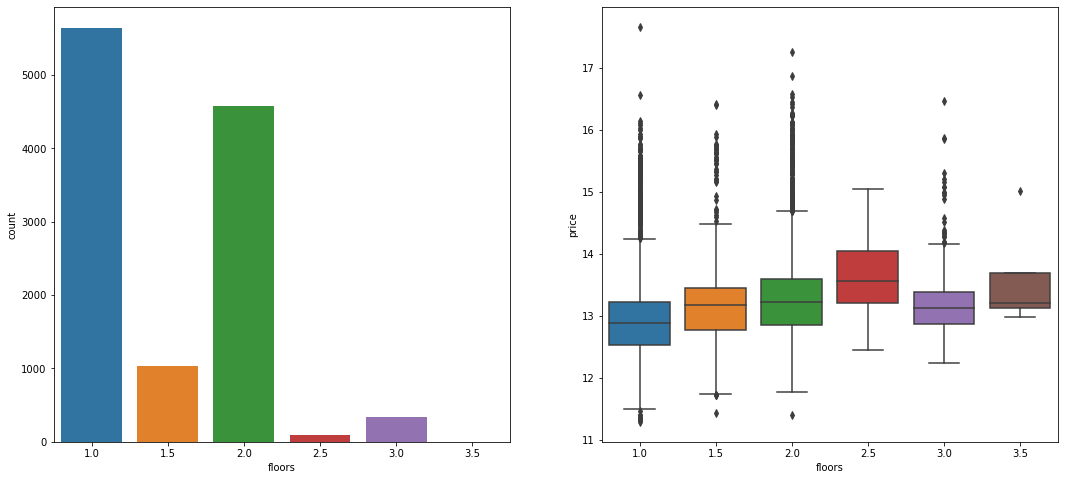

In [167]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='floors', data=data, ax=ax[0])
sns.boxplot(x='floors', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

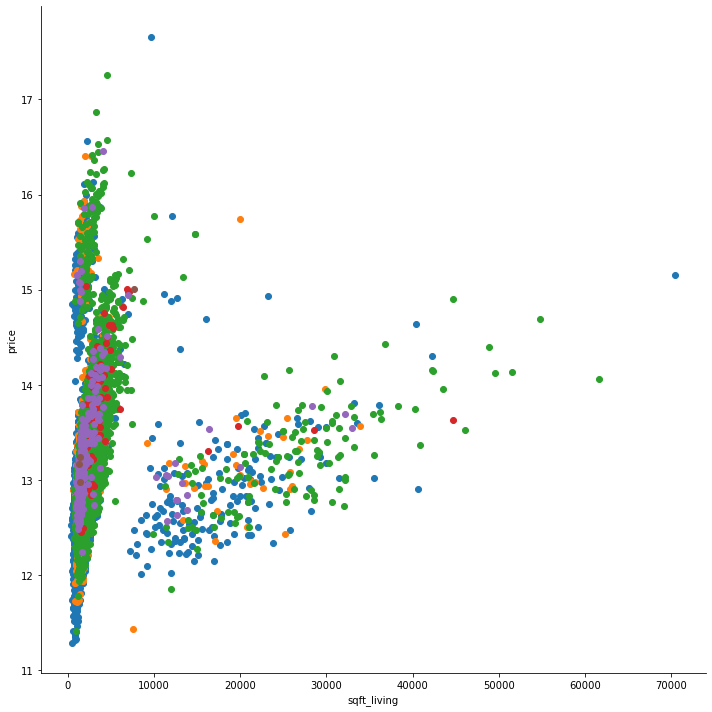

In [168]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='floors', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Grade

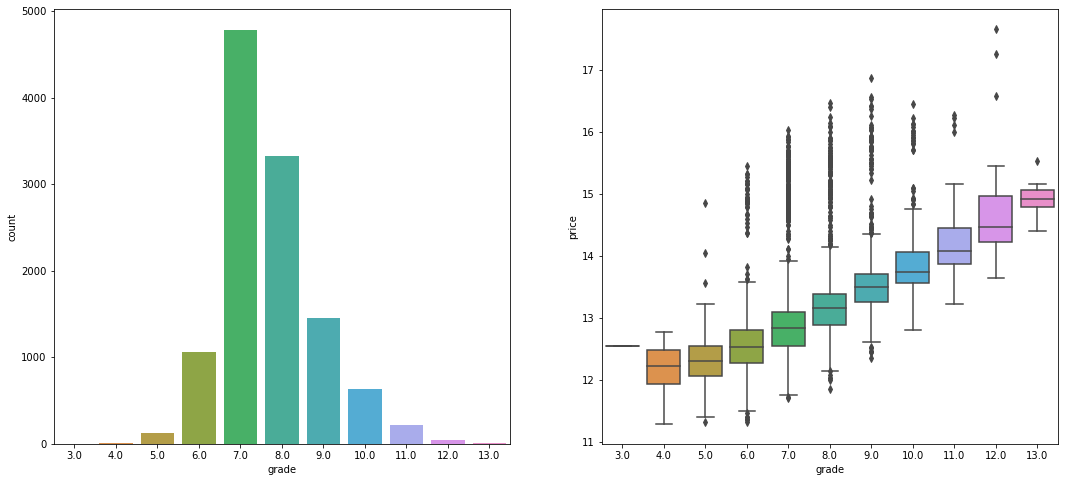

In [169]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='grade', data=data, ax=ax[0])
sns.boxplot(x='grade', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

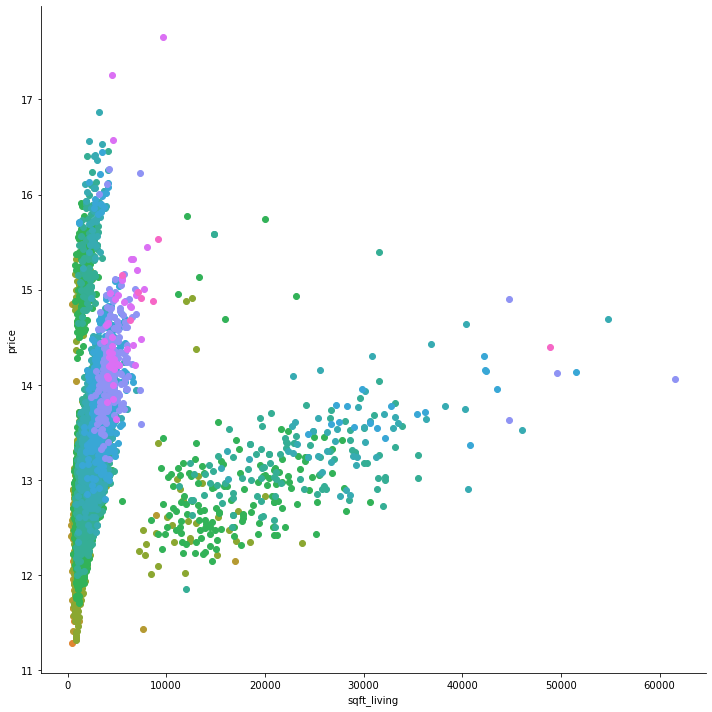

In [170]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='grade', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

In [174]:
data['sqft_living'] = np.log(data['sqft_living'])

<ipython-input-174-ad66c25138a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_living'] = np.log(data['sqft_living'])


<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

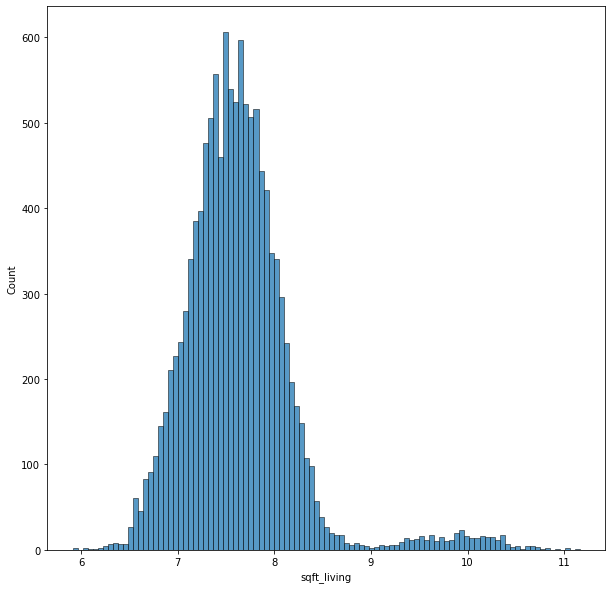

In [175]:
plt.figure(figsize=(10, 10))
sns.histplot(data, x='sqft_living',)

In [179]:
len(data[data['sqft_living'] > 9])

359

In [181]:
data = data[data['sqft_living'] < 9]

<Figure size 864x576 with 0 Axes>

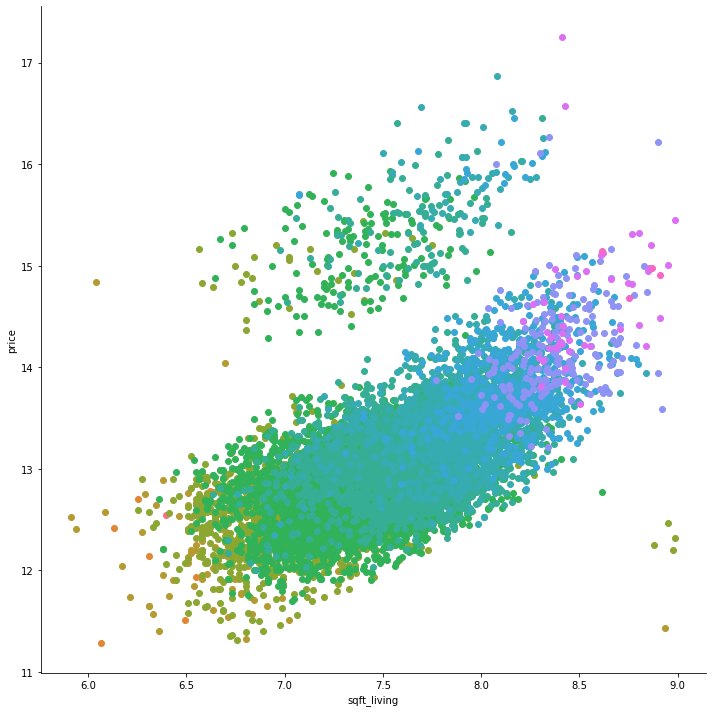

In [180]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=d, hue='grade', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

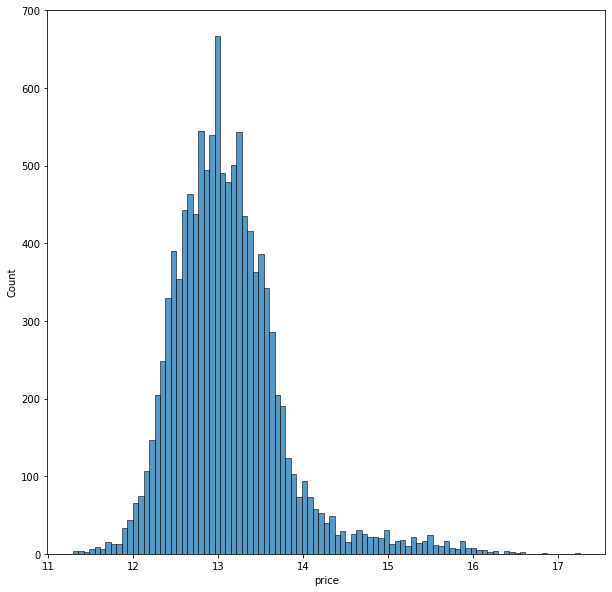

In [182]:
plt.figure(figsize=(10, 10))
sns.histplot(data, x='price',)

### Корреляции в категориях

In [183]:
bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bath[0]], data[bath[1]]).style.background_gradient(cmap = cm)

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
bathrooms,,,,,,,,
0.5,1,1,0,1,0,0,0,0
0.75,11,19,8,2,0,0,0,0
1.0,81,822,927,171,22,3,1,0
1.25,1,2,2,0,0,0,0,0
1.5,8,161,450,129,26,5,1,0
1.75,3,170,1000,384,64,7,0,0
2.0,3,117,572,271,58,11,0,0
2.25,1,65,590,390,60,6,2,0
2.5,1,113,1267,1384,144,16,1,0


In [184]:
bath_cond = ['bathrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bath_cond[0]], data[bath_cond[1]]).style.background_gradient(cmap = cm)

condition,1.0,2.0,3.0,4.0,5.0
bathrooms,,,,,
0.5,0,0,2,1,0
0.75,0,3,18,12,6
1.0,10,42,1094,648,179
1.25,0,0,3,2,0
1.5,3,7,433,257,55
1.75,0,10,745,632,191
2.0,2,7,553,274,166
2.25,0,2,654,347,75
2.5,0,4,2272,437,131


In [185]:
bed_cond = ['bedrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bed_cond[0]], data[bed_cond[1]]).style.background_gradient(cmap = cm)

condition,1.0,2.0,3.0,4.0,5.0
bedrooms,,,,,
1.0,3,4,71,25,6
2.0,4,24,900,395,125
3.0,4,33,3273,1374,437
4.0,3,15,2397,919,335
5.0,0,1,529,199,79
6.0,1,0,77,47,12
7.0,0,0,12,4,2
8.0,0,0,6,2,2


In [186]:
cond_water = ['condition', 'waterfront']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[cond_water[0]], data[cond_water[1]]).style.background_gradient(cmap = cm)

waterfront,0.0,1.0
condition,,
1.0,15,0
2.0,77,0
3.0,6997,49
4.0,2837,28
5.0,964,10


In [187]:
grade_cond = ['grade', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_cond[0]], data[grade_cond[1]]).style.background_gradient(cmap = cm)

condition,1.0,2.0,3.0,4.0,5.0
grade,,,,,
3.0,0,1,0,0,0
4.0,1,2,5,5,0
5.0,4,8,48,35,21
6.0,6,27,499,333,135
7.0,3,27,2603,1419,455
8.0,1,4,2138,752,241
9.0,0,2,1055,235,75
10.0,0,1,478,82,31
11.0,0,0,167,30,6


In [188]:
grade_bed = ['grade', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_bed[0]], data[grade_bed[1]]).style.background_gradient(cmap = cm)

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
grade,,,,,,,,
3.0,1,0,0,0,0,0,0,0
4.0,4,8,1,0,0,0,0,0
5.0,18,53,31,17,2,1,0,0
6.0,45,431,418,121,16,4,1,0
7.0,30,630,2569,1106,251,50,5,4
8.0,7,270,1462,1199,227,49,6,4
9.0,2,45,429,753,165,13,0,0
10.0,0,11,158,341,89,13,4,1
11.0,0,2,36,126,42,4,3,0


In [189]:
grade_bath = ['grade', 'bathrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_bath[0]], data[grade_bath[1]]).style.background_gradient(cmap = cm)

bathrooms,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25,5.5,6.0,6.75
grade,,,,,,,,,,,,,,,,,,,,,,,
3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,0,6,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.0,0,8,94,0,4,5,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6.0,2,14,722,0,64,113,97,2,11,6,3,0,1,1,0,0,0,0,0,0,0,0,0
7.0,0,11,1074,2,527,982,585,406,733,159,105,15,24,6,8,2,3,1,2,0,0,0,0
8.0,1,0,77,1,151,417,252,503,1198,256,133,92,105,10,11,4,11,0,1,0,0,1,0
9.0,0,0,3,2,14,46,52,129,650,175,87,89,121,18,11,4,6,0,0,0,0,0,0
10.0,0,0,0,0,2,5,5,33,210,56,47,68,95,34,20,12,21,4,3,1,1,0,0
11.0,0,0,0,0,1,2,0,1,26,11,11,36,53,13,14,11,14,8,4,3,4,0,1


### Корреляция в вещественных

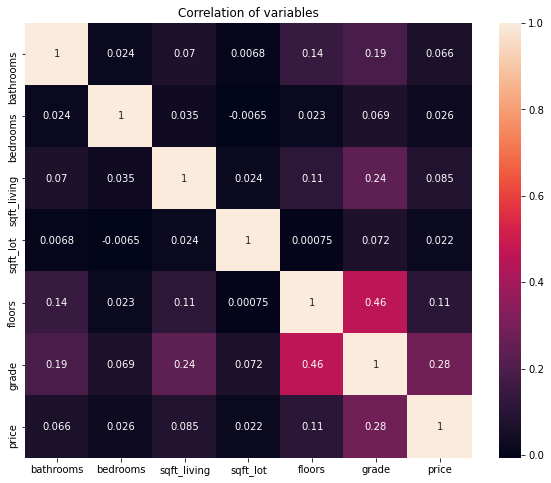

In [41]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

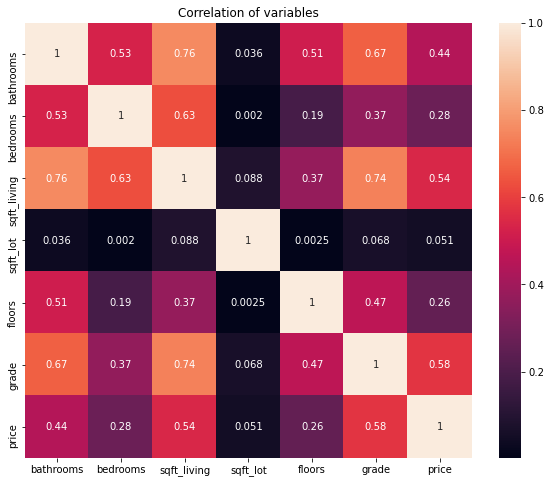

In [190]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

### Посмотрим на зависимости года постройки и цены

/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

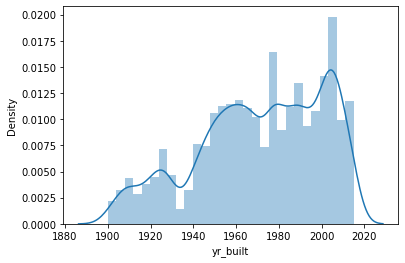

In [191]:
sns.distplot(data['yr_built'])

/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


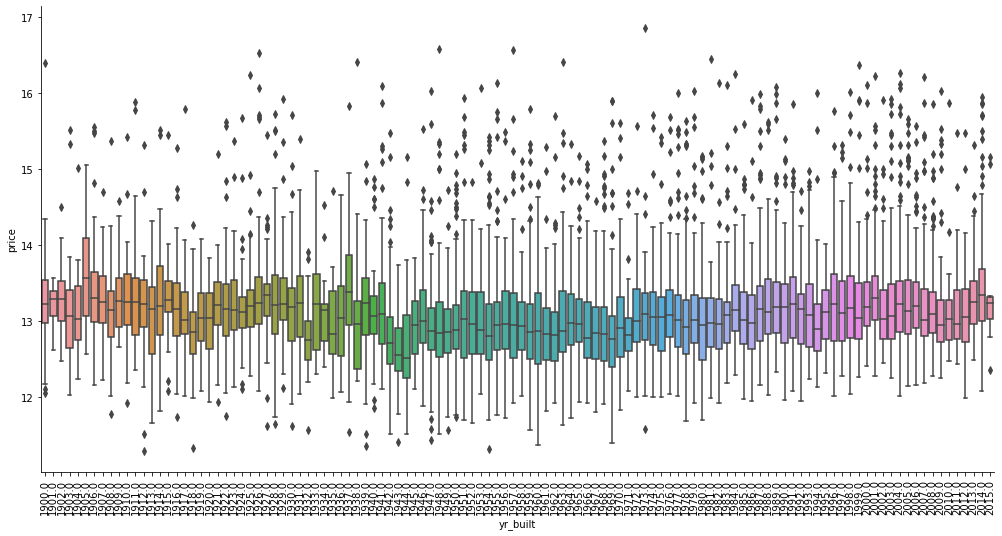

In [192]:
g = sns.factorplot(x="yr_built", y = "price", data=data[data['price'] < 1000000], 
                   size= 7, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14118 entries, 1011 to 15128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             14118 non-null  int64         
 1   date           14118 non-null  datetime64[ns]
 2   price          13763 non-null  float64       
 3   bedrooms       13615 non-null  float64       
 4   bathrooms      13616 non-null  float64       
 5   sqft_living    13618 non-null  float64       
 6   sqft_lot       13618 non-null  float64       
 7   floors         13701 non-null  float64       
 8   waterfront     13700 non-null  float64       
 9   view           13704 non-null  float64       
 10  condition      13676 non-null  float64       
 11  grade          13693 non-null  float64       
 12  sqft_above     13569 non-null  float64       
 13  sqft_basement  13676 non-null  float64       
 14  yr_built       13698 non-null  float64       
 15  yr_renovated   1

### Д/З

Необходимо:
    
    1) Рассмотреть как выглядят данные до и после удаления выбросов, проанализировать как могут выбросы влиять на данные и совместные распределения
    2) В данных еще есть выбросы нужно их найти и избавиться от них (либо попробовать использовать)
    3) Придумать новые признаки (возраст здания и т.п. для дальнейшего обучения модели)
    4) Создать эти признаки для тестовой выборки на основе трейновой
    5) Обучить на этих данных модель сравнить с качеством бейзлайна
    6) Подобрать параметры и оценить насколько удалось улучшить качество за счет подбора параметров
    